<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/Copy_with_working_accuracy_really_%20this_time_of_MINST_ROC_VB_comments_and_additions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [3]:
num_classes = 10 
input_shape = (28, 28, 1)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [4]:
basic_model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
basic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [6]:
opt = keras.optimizers.Adam(learning_rate=0.01)
basic_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [7]:
basic_model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split= 0.1)

422/422 [==============================] - 41s 95ms/step - loss: 0.1799 - accuracy: 0.9454 - val_loss: 0.0556 - val_accuracy: 0.9858


In [8]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.0488 - accuracy: 0.9842
Loss =  0.04879628121852875
Accuracy =  0.9842000007629395


In [9]:
y_score = basic_model.predict(X_test)

In [17]:
y_score = np.argmax(y_score,axis=1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False, categories=[np.arange(10)])

In [50]:
one_hot = enc.fit(y_score[:,None]).transform(y_score[:,None])

In [62]:
# VB: calculating accuracy in one line :)

In [63]:
np.sum(np.prod(y_test==one_hot,axis=1))/len(y_test)

0.9842

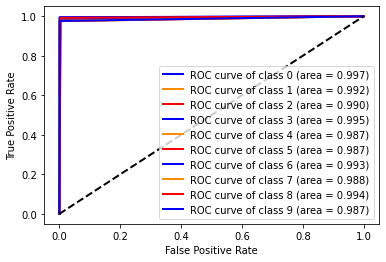

In [65]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    # VB: You were passing two arrays that could no be sensibly compared. Both need to be one hot encoded.
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], np.squeeze(one_hot[:, i]))
    roc_auc[i]        = auc(fpr[i], tpr[i])


colors = cycle(['blue', 'darkorange', 'red'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#plt.xlim(-0.005, 0.06)
#plt.ylim(0.99, 1.001)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()    

VB: Total accuracy calculation looks great!

In [16]:
## calulate accuracy by hand
probs  = basic_model.predict(X_test)
y_pred = (np.argmax(probs,axis=1)).astype('int')

## VB: you can use argmax here, but since this is one-hot encoded you could as well just do np.where(y_test==1)[1]
y_true = np.where(y_test==1)[1]#(np.argmax(y_test,axis=1)).astype('int')

print(y_pred)
print(y_true)

def tot_acc(prediction, true_value):
	count= 0
	for i in range(len(y_true)):
		if y_pred[i] == y_true[i]:
			count = count +1
	acc= count/len(y_true)*100
	return print("Your total accuracy is :",acc,"%")


tot_acc(y_pred,y_true)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Your total accuracy is : 98.42 %


In [ ]:
# VB: Can you explain to me line-by-line what this does and why?
def singular_acc(target_class):
  y_p = y_pred[y_pred==target_class]
  y_t = y_true[y_true==target_class]
  count = 0
  if len(y_t)==len(y_p):
    for i in range(y_t):
      if y_p[i]==y_t[i]:
        count = count+1
  else:
    if len(y_p) > len(y_t):
      count=  -(len(y_p)-len(y_t))
      for i in range(len(y_t)):
        if y_p[i] == y_t[i]:
          count = count +1 
    elif len(y_p) < len(y_t):
      count = -(len(y_t)-len(y_p))
      for i in range(len(y_p)):
        if y_p[i] == y_t[i]:
          count = count +1
  acc = count/len(y_t)*100




  return print(acc,"% for class", target_class)
 

for i in range (10):
  singular_acc(i)








98.36734693877551 % for class 0
97.53303964757708 % for class 1
99.2248062015504 % for class 2
99.9009900990099 % for class 3
99.18533604887983 % for class 4
99.77578475336323 % for class 5
99.47807933194154 % for class 6
99.22178988326849 % for class 7
98.870636550308 % for class 8
93.45887016848364 % for class 9
